In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sspspace import SSPSpace, HexagonalSSPSpace, RandomSSPSpace
from rsspspace import RSSPSpace

In [178]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=0.2)

def length_scale_fun(x):
    length_scale = 10*np.ones(x.shape)
    dist = np.sqrt(np.sum((x - np.pi)**2,axis=1))
    length_scale[dist < 1 ,:] = 0.5 #(dist[dist<1] + 0.5).reshape(-1,1)
    return length_scale #x*(1/((x - np.pi)*length_scale + np.pi))

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=20*np.array([[-1,1],[-1,1]]),
        axis_matrix = sspspace1.axis_matrix,
        length_scale=length_scale_fun)

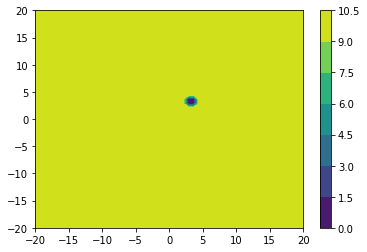

In [179]:
xs = np.linspace(-20,20)
ys = np.linspace(-20,20)
X,Y = np.meshgrid(xs,ys)
xy = np.vstack([X.reshape(-1),Y.reshape(-1)]).T
lenvals = length_scale_fun(xy)
plt.contourf(X,Y,lenvals[:,0].reshape(X.shape))
plt.colorbar()

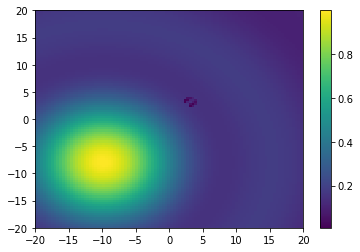

In [180]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([-10,-8])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

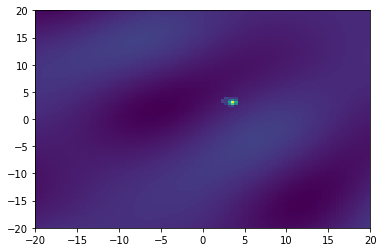

In [181]:
ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
rsspspace.similarity_plot(ssp2)

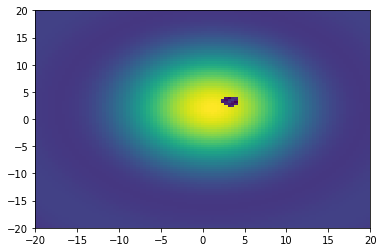

In [144]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([1,2])))

rsspspace.similarity_plot(ssp1)

In [145]:
easom_func = lambda x: np.cos(x[:,0])*np.cos(x[:,1])*np.exp(-np.sum((x-np.pi)**2,axis=1))

<ipython-input-146-fd42bf5f273c>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,easom_func(xy).reshape(X.shape))


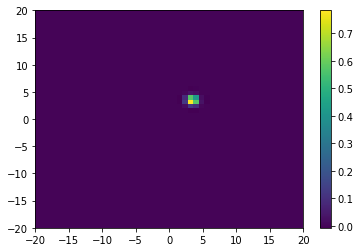

In [146]:
plt.pcolormesh(X,Y,easom_func(xy).reshape(X.shape))
plt.colorbar()

In [147]:
import ssp_bayes_opt

bounds = 20*np.array([[-1,1],[-1,1]])
budget = 200
optimizer = ssp_bayes_opt.BayesianOptimization(f=easom_func, bounds=bounds, 
                                                verbose=True)
        
optimizer.maximize(init_points=10, n_iter=budget,
                    agent_type='ssp-custom',ssp_space=rsspspace)

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


| iter	 | target	 | x	 |
-------------------------------
| 0	 | [[0.22017809]], [142.3261802]	 | [[2.87625418 4.08026756]]	 |
| 1	 | [[1.49781207e-169]], [39.68800777]	 | [[-7.02341137 20.        ]]	 |
| 2	 | [[0.35687795]], [48.05961254]	 | [[2.34113712 3.27759197]]	 |
| 3	 | [[0.76556723]], [30.09645022]	 | [[2.74247492 3.01003344]]	 |
| 4	 | [[0.5094631]], [16.87321766]	 | [[2.60869565 2.74247492]]	 |
| 5	 | [[0.70414404]], [15.43803373]	 | [[2.74247492 3.41137124]]	 |
| 6	 | [[0.32499868]], [31.39406225]	 | [[3.94648829 3.41137124]]	 |
| 7	 | [[0.41733043]], [6.59540072]	 | [[2.60869565 3.67892977]]	 |
| 8	 | [[0.24914684]], [19.3873806]	 | [[3.81270903 3.81270903]]	 |
| 9	 | [[0.76556723]], [8.24721709e-13]	 | [[2.74247492 3.01003344]]	 |
| 10	 | [[0.]], [22.87399868]	 | [[-18.66220736  20.        ]]	 |
| 11	 | [[0.23616618]], [24.05401053]	 | [[3.67892977 2.34113712]]	 |
| 12	 | [[1.22003353e-32]], [13.50289515]	 | [[11.0367893   5.95317726]]	 |
| 13	 | [[0.64839589]], [0.8718819

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/blr.py:55: RuntimeWarning: covariance is not positive-semidefinite.
  phi_init = np.atleast_2d(np.random.multivariate_normal(self.m.flatten(),


| 88	 | [[0.22017809]], [5.15451068e-13]	 | [[4.08026756 2.87625418]]	 |
| 89	 | [[0.23616618]], [6.18541282e-13]	 | [[3.67892977 2.34113712]]	 |
| 90	 | [[5.33484013e-154]], [0.00033316]	 | [[11.30434783 20.        ]]	 |
| 91	 | [[2.08566502e-80]], [0.00108619]	 | [[  2.60869565 -10.36789298]]	 |
| 92	 | [[0.23810032]], [0.00083125]	 | [[4.08026756 3.27759197]]	 |
| 93	 | [[0.32126564]], [8.48602826e-05]	 | [[3.67892977 3.81270903]]	 |
| 94	 | [[0.24834218]], [0.0001131]	 | [[2.20735786 3.14381271]]	 |
| 95	 | [[0.35271828]], [6.42593293e-05]	 | [[3.27759197 3.94648829]]	 |
| 96	 | [[0.58317138]], [9.38732764e-06]	 | [[2.87625418 2.60869565]]	 |
| 97	 | [[0.49095955]], [3.66512925e-06]	 | [[2.47491639 3.01003344]]	 |
| 98	 | [[0.28494341]], [2.62624418e-05]	 | [[3.94648829 2.74247492]]	 |
| 99	 | [[0.5094631]], [3.66579522e-08]	 | [[2.74247492 2.60869565]]	 |
| 100	 | [[-5.71919754e-88]], [3.19862209e-05]	 | [[-10.36789298   7.2909699 ]]	 |
| 101	 | [[3.69593777e-37]], [3.97323367e-05

SystemError: <class 'numpy.linalg.LinAlgError'> returned a result with an error set

In [164]:
vals = np.zeros((10 + budget,))

for i, res in enumerate(optimizer.res):
    vals[i] = res['target']
    #if i >0:
     #   vals[i] = np.max(vals[:i])
best_vals = [np.max(vals[0:i]) for i in range(1,10 + budget)]

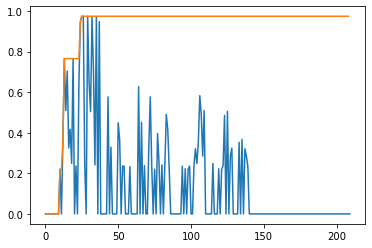

In [165]:
plt.figure()
plt.plot(vals)
plt.plot(best_vals)

In [168]:
optimizer = ssp_bayes_opt.BayesianOptimization(f=easom_func, bounds=bounds, 
                                                verbose=True)
        
optimizer.maximize(init_points=10, n_iter=budget,
                    agent_type='ssp-hex')


/home/ns2dumon/anaconda3/lib/python3.8/site-packages/scipy/stats/_qmc.py:1078: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  warnings.warn("The balance properties of Sobol' points require"


| iter	 | target	 | x	 |
-------------------------------
| 0	 | [[5.26530802e-135]], [129.35920708]	 | [[18.26086957 -5.81939799]]	 |
| 1	 | [[5.90890482e-127]], [58.23910159]	 | [[-0.06688963 19.86622074]]	 |
| 2	 | [[1.30236278e-88]], [45.85916441]	 | [[10.63545151 15.18394649]]	 |
| 3	 | [[-2.26102796e-260]], [36.91075353]	 | [[-14.51505017  20.        ]]	 |
| 4	 | [[2.2775968e-170]], [29.78647922]	 | [[ 16.92307692 -10.90301003]]	 |
| 5	 | [[-5.79168222e-247]], [0.06578599]	 | [[-17.59197324  -8.49498328]]	 |
| 6	 | [[-1.10548461e-261]], [8.19946437]	 | [[-18.1270903   -9.03010033]]	 |
| 7	 | [[-7.99862848e-230]], [8.01895075]	 | [[-16.92307692  -7.82608696]]	 |
| 8	 | [[-5.11407526e-214]], [8.43974393]	 | [[-16.38795987  -7.2909699 ]]	 |
| 9	 | [[-2.33679074e-281]], [8.710564]	 | [[-18.79598662  -9.69899666]]	 |
| 10	 | [[-1.33865553e-299]], [9.8584974]	 | [[-19.33110368 -10.36789298]]	 |
| 11	 | [[-1.68838465e-195]], [10.92593209]	 | [[-15.71906355  -6.48829431]]	 |
| 12	 | [[-1.

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/blr.py:55: RuntimeWarning: covariance is not positive-semidefinite.
  phi_init = np.atleast_2d(np.random.multivariate_normal(self.m.flatten(),


| 40	 | [[-5.30154911e-102]], [8.44126178]	 | [[15.85284281 -5.28428094]]	 |
| 41	 | [[-1.42141156e-206]], [6.96025801]	 | [[  8.22742475 -17.99331104]]	 |
| 42	 | [[2.10707437e-68]], [8.44986533]	 | [[12.64214047 -4.74916388]]	 |
| 43	 | [[-1.08263505e-177]], [6.58504558]	 | [[-16.78929766   6.22073579]]	 |
| 44	 | [[-1.04590676e-46]], [7.02705443]	 | [[ 7.95986622 -5.81939799]]	 |
| 45	 | [[3.7313013e-40]], [6.93313649]	 | [[12.24080268  0.33444816]]	 |
| 46	 | [[1.73445259e-109]], [6.5092078]	 | [[ -1.00334448 -12.10702341]]	 |
| 47	 | [[2.0053044e-81]], [6.00340552]	 | [[-6.75585284 12.5083612 ]]	 |
| 48	 | [[7.64905698e-171]], [7.68055251]	 | [[20.         13.44481605]]	 |
| 49	 | [[-6.35396692e-217]], [6.56707819]	 | [[  9.43143813 -18.26086957]]	 |
| 50	 | [[7.47314728e-214]], [6.69730175]	 | [[  6.22073579 -18.79598662]]	 |
| 51	 | [[-2.36716403e-139]], [6.00531522]	 | [[-13.04347826  -4.34782609]]	 |
| 52	 | [[3.45359019e-217]], [7.41878199]	 | [[ -9.96655518 -14.91638796]]	 |

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/agents/ssp_agent.py:108: RuntimeWarning: overflow encountered in matmul
  val = phi.T @ m
/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/agents/ssp_agent.py:109: RuntimeWarning: overflow encountered in matmul
  mi = np.sqrt(gamma + beta_inv + phi.T @ sigma @ phi) - np.sqrt(gamma)
/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/agents/ssp_agent.py:109: RuntimeWarning: invalid value encountered in matmul
  mi = np.sqrt(gamma + beta_inv + phi.T @ sigma @ phi) - np.sqrt(gamma)
/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/agents/ssp_agent.py:117: RuntimeWarning: overflow encountered in matmul
  sqr = (phi.T @ sigma @ phi)
/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/agents/ssp_agent.py:117: RuntimeWarning:

| 82	 | [[-2.68693191e-186]], [3.64907867]	 | [[ -1.00334448 -17.05685619]]	 |
| 83	 | [[-8.25023123e-253]], [3.04062232]	 | [[ 18.92976589 -15.05016722]]	 |
| 84	 | [[-4.38728911e-204]], [3.04585643]	 | [[ -7.42474916 -15.71906355]]	 |
| 85	 | [[7.02892612e-201]], [3.14532843]	 | [[-17.85953177   7.42474916]]	 |
| 86	 | [[3.0435613e-230]], [3.25269935]	 | [[-19.73244147   4.88294314]]	 |
| 87	 | [[-0.]], [1.88840638]	 | [[-20.         -16.78929766]]	 |
| 88	 | [[7.94637678e-56]], [2.95893059]	 | [[ 6.88963211 13.71237458]]	 |
| 89	 | [[-9.75795174e-126]], [2.65299314]	 | [[ 12.77591973 -10.76923077]]	 |
| 90	 | [[2.50258845e-36]], [3.3294019]	 | [[-5.55183946  5.55183946]]	 |
| 91	 | [[5.21899121e-156]], [3.76760601]	 | [[-13.04347826  12.909699  ]]	 |
| 92	 | [[1.56259091e-31]], [1.91717114]	 | [[ 5.01672241 11.17056856]]	 |
| 93	 | [[0.]], [2.27886431]	 | [[-13.84615385 -20.        ]]	 |
| 94	 | [[9.58011859e-59]], [2.52023303]	 | [[14.51505017  1.80602007]]	 |
| 95	 | [[2.69444229e

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/agents/ssp_agent.py:109: RuntimeWarning: invalid value encountered in sqrt
  mi = np.sqrt(gamma + beta_inv + phi.T @ sigma @ phi) - np.sqrt(gamma)
/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/agents/ssp_agent.py:118: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(sqr + gamma + beta_inv)


| 126	 | [[-3.8528334e-289]], [6.55377477e-06]	 | [[-20.          -8.09364548]]	 |
| 127	 | [[-1.39675939e-137]], [2.9282837e-07]	 | [[-13.44481605   9.43143813]]	 |
| 128	 | [[2.30881074e-248]], [-2.16439347e-07]	 | [[20. 20.]]	 |
| 129	 | [[2.85333704e-125]], [8.59772382e-11]	 | [[ 11.43812709 -11.57190635]]	 |
| 130	 | [[8.5164472e-12]], [7.93176104e-10]	 | [[7.95986622 3.01003344]]	 |
| 131	 | [[1.5050065e-181]], [3.27826879e-11]	 | [[-16.38795987  -2.74247492]]	 |
| 132	 | [[-2.45598178e-26]], [2.02056819e-11]	 | [[10.10033445 -0.06688963]]	 |
| 133	 | [[0.]], [-1.26862817e-09]	 | [[ 20. -20.]]	 |
| 134	 | [[-1.37292052e-77]], [9.48429965e-12]	 | [[16.2541806   1.13712375]]	 |
| 135	 | [[2.48571595e-120]], [-4.94833025e-12]	 | [[ 11.0367893  -11.30434783]]	 |


/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/blr.py:42: RuntimeWarning: overflow encountered in matmul
  self.m = S @ (self.S_inv @ self.m + x)
/home/ns2dumon/anaconda3/lib/python3.8/site-packages/ssp_bayes_opt-0.1-py3.8.egg/ssp_bayes_opt/blr.py:42: RuntimeWarning: invalid value encountered in matmul
  self.m = S @ (self.S_inv @ self.m + x)


| 136	 | [[0.]], [2.98961619e-11]	 | [[-20. -20.]]	 |
| 137	 | [[0.]], [2.06180427e-12]	 | [[-20. -20.]]	 |
| 138	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 139	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 140	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 141	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 142	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 143	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 144	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 145	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 146	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 147	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 148	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 149	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 150	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 151	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 152	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 153	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 154	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 155	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 156	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 157	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 158	 | [[0.]], [0.]	 | [[-20. -20.]]	 |
| 159	 | [

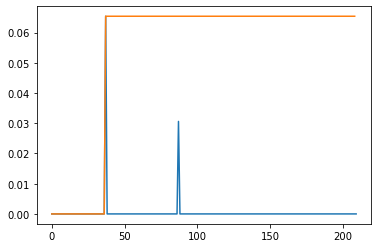

In [169]:
vals = np.zeros((10 + budget,))

for i, res in enumerate(optimizer.res):
    vals[i] = res['target']
    #if i >0:
     #   vals[i] = np.max(vals[:i])
best_vals = [np.max(vals[0:i]) for i in range(1,10 + budget)]

plt.figure()
plt.plot(vals)
plt.plot(best_vals)

In [17]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=0.2)


def length_scale_fun(x):
    length_scale = 1/np.min([x,1e-5])# 10*np.ones(x.shape)
    #dist = np.sqrt(np.sum((x - np.pi)**2,axis=1))
    #length_scale[dist < 3 ,:] = dist[dist < 3].reshape(-1,1)+0.5 #(dist[dist<1] + 0.5).reshape(-1,1)
    return length_scale 

def axis_matrix_fun(x):
    x=x.reshape(1,2)
    return np.fft.ifft(np.fft.fft(sspspace1.axis_matrix,axis=0)**x,axis=0).real

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=20*np.array([[-1,1],[-1,1]]),
        axis_matrix = axis_matrix_fun,
        length_scale=length_scale_fun)

In [18]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([-10,-8])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

/home/ns2dumon/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

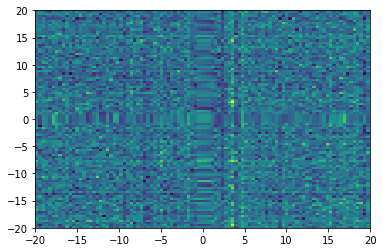

In [16]:
ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
rsspspace.similarity_plot(ssp2)

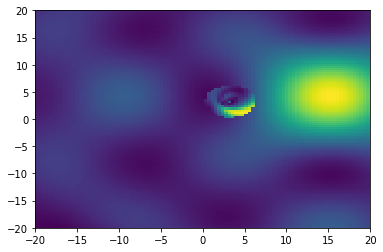

In [13]:
ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+1,np.pi-2])))
rsspspace.similarity_plot(ssp2)

In [134]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=0.2)

def length_scale_fun(x):
    length_scale = 10*np.ones(x.shape)
    dist = np.sqrt(np.sum(x**2,axis=1))
    length_scale = -20*np.exp(-(dist + 0.1)).reshape(-1,1)
    return length_scale - np.min(length_scale) + 1

rsspspace = RSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=20*np.array([[-1,1],[-1,1]]),
        axis_matrix = sspspace1.axis_matrix,
        length_scale=length_scale_fun)

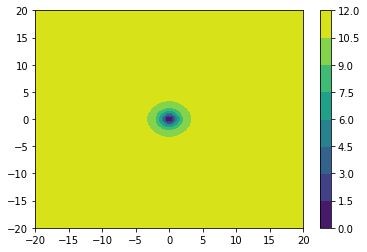

In [135]:
xs = np.linspace(-20,20)
ys = np.linspace(-20,20)
X,Y = np.meshgrid(xs,ys)
xy = np.vstack([X.reshape(-1),Y.reshape(-1)]).T
lenvals = length_scale_fun(xy)
plt.contourf(X,Y,lenvals[:,0].reshape(X.shape))
plt.colorbar()

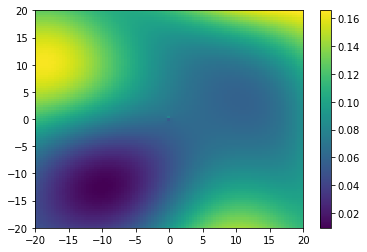

In [136]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([-10,-8])))

im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

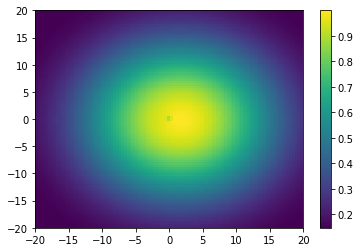

In [137]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([0.1,-0.02])))
im=rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

In [43]:
def julia_recurse(z, c, n_iter=1000, R=10):
    if abs(z) > R or n_iter <= 0:
        return 0
    return 1 + julia_recurse(z**2 + c, c, n_iter - 1)
    
    
def julia_set(c, n_iter=1000, R=10,
              resolution=(500, 500),
              x=(-1.5, 1.5), y=(-1.5, 1.5)):
    """Adapted from https://scipython.com/book/chapter-7-matplotlib/problems/p72/the-julia-set/"""
    im_width, im_height = resolution
    xmin, xmax = x
    xwidth = xmax - xmin
    ymin, ymax = y
    yheight = ymax - ymin

    julia = np.zeros((im_height, im_width))
    for ix in range(im_width):
        for iy in range(im_height):
            nit = 0
            # Map pixel position to a point in the complex plane
            z = complex(ix / im_width * xwidth + xmin,
                        iy / im_height * yheight + ymin)
            # Do the iterations
            ratio = julia_recurse(z, c, n_iter, R) / n_iter
            julia[im_height-1-iy, ix] = ratio

    return julia

In [44]:
zoom = 0.5  # 1.45
res = 501
# c = complex(-0.4, 0.6)
c = complex(-0.1, 0.65)

R = np.roots([1, -1, -np.abs(c)])[0]
R

1.4527052649682877

In [77]:
sspspace1 = HexagonalSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=np.array([[-1,1],[-1,1]]), length_scale=zoom)

def axis_matrix_fun(x):
    x = x.reshape(-1)
    i = julia_recurse(x[0] + 1j * x[1], c,R=R) / 50
    
    return np.fft.ifft(np.fft.fft(sspspace1.axis_matrix,axis=0)**i,axis=0).real


rsspspace = RSSPSpace(domain_dim=2, ssp_dim=385, 
        domain_bounds=20*np.array([[-1,1],[-1,1]]),
        axis_matrix = axis_matrix_fun,length_scale=lambda x: 1/4*np.ones(x.shape))

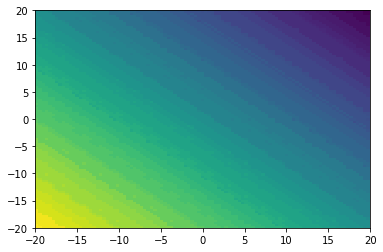

In [78]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([-10,-8])))
rsspspace.similarity_plot(ssp1)

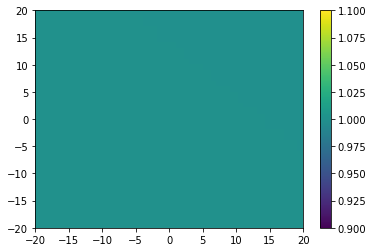

In [63]:
ssp1 = rsspspace.encode(np.atleast_2d(np.array([0,0])))
im = rsspspace.similarity_plot(ssp1)
plt.colorbar(im)

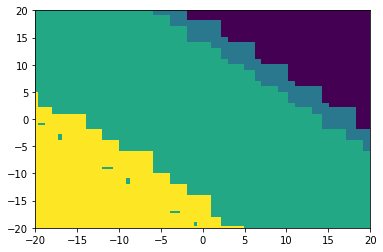

In [64]:
ssp2 = rsspspace.encode(np.atleast_2d(np.array([np.pi+0.3,np.pi-0.2])))
rsspspace.similarity_plot(ssp2)